In [1]:
# import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# import the dataset
df = pd.read_csv('heart.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'heart.csv'

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# Preprocessing

In [4]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
# creating train, dev set
train = df.loc[:900] # trainig set
dev = df.loc[901:] # development set to test overfitting

In [6]:
train.shape, dev.shape

((901, 14), (124, 14))

In [7]:
train.target.value_counts()

1    464
0    437
Name: target, dtype: int64

In [8]:
dev.target.value_counts()

0    62
1    62
Name: target, dtype: int64

In [9]:
# creating dependent and independent matrix of features
x = train.iloc[:, :-1]
y = train.iloc[:, -1]

# Modeling

In [10]:
# create training and test sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.25, random_state = 31)

In [11]:
len(x_train), len(x_test), len(y_train), len(y_test)

(675, 226, 675, 226)

In [12]:
x_train.shape

(675, 13)

# Logistic Regression

### Train set

In [13]:
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression(max_iter = 1000, random_state = 31)
log_clf.fit(x_train, y_train)
print(log_clf.score(x_test, y_test))

0.8938053097345132


In [14]:
from sklearn.metrics import classification_report
y_preds = log_clf.predict(x_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       100
           1       0.90      0.91      0.91       126

    accuracy                           0.89       226
   macro avg       0.89      0.89      0.89       226
weighted avg       0.89      0.89      0.89       226



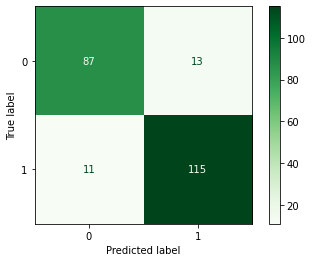

In [15]:
# confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns  # Optional, for a more visually appealing plot

# Assuming log_clf is a trained Logistic Regression model
y_pred = log_clf.predict(x_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

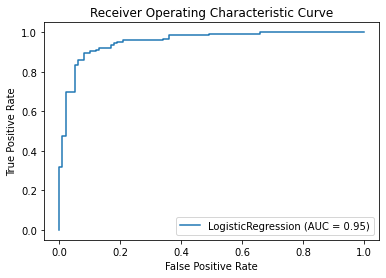

In [16]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming log_clf is a trained Logistic Regression model
y_scores = log_clf.decision_function(x_test)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')
plt.show()


### dev set (to test overfitting)

In [17]:
devx = dev.drop('target', axis = 1)
devy = dev['target']

In [18]:
dev_preds = log_clf.predict(devx)
log_clf.score(devx, devy)

0.782258064516129

In [19]:
print(classification_report(devy, dev_preds))

              precision    recall  f1-score   support

           0       0.82      0.73      0.77        62
           1       0.75      0.84      0.79        62

    accuracy                           0.78       124
   macro avg       0.79      0.78      0.78       124
weighted avg       0.79      0.78      0.78       124



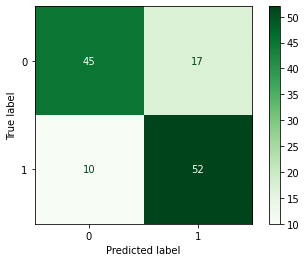

In [20]:
# confusion matrix

import matplotlib.pyplot as plt
import seaborn as sns  # Optional, for a more visually appealing plot

# Assuming log_clf is a trained Logistic Regression model
y_pred = log_clf.predict(x_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

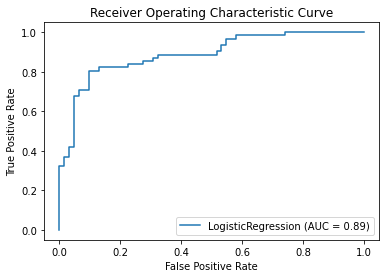

In [21]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming log_clf is a trained Logistic Regression model
y_scores = log_clf.decision_function(x_test)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')
plt.show()


# KNN

### Train set

In [22]:
from sklearn.neighbors import KNeighborsClassifier

# Parameters taken from grid search best params.
knn_clf = KNeighborsClassifier(algorithm = 'auto',
                               leaf_size = 10,
                               n_neighbors = 2,
                               p = 2)
knn_clf.fit(x_train, y_train)
print(knn_clf.score(x_test, y_test))

0.8805309734513275


In [23]:
y_preds = knn_clf.predict(x_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.99      0.88       100
           1       0.99      0.79      0.88       126

    accuracy                           0.88       226
   macro avg       0.89      0.89      0.88       226
weighted avg       0.90      0.88      0.88       226



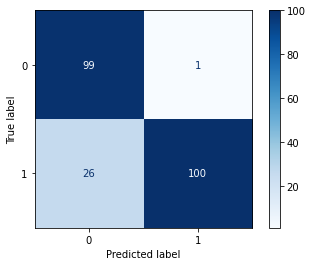

In [24]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming knn_clf is a trained k-nearest neighbors classifier
y_pred_knn = knn_clf.predict(x_test)

# Compute confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (k-Nearest Neighbors)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


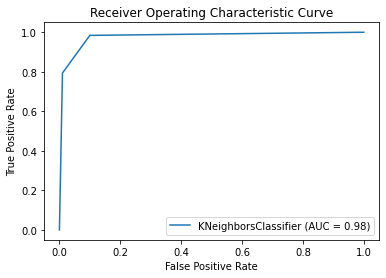

In [25]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming knn_clf is a trained k-nearest neighbors classifier
y_scores_knn = knn_clf.predict_proba(x_test)[:, 1]  # Probability estimates for the positive class

# Compute ROC curve and AUC
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_scores_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label=f'AUC = {roc_auc_knn:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve (k-Nearest Neighbors)')
plt.legend(loc='lower right')
plt.show()


### dev set (to test overfitting)

In [26]:
dev_preds = knn_clf.predict(devx)
knn_clf.score(devx, devy)

0.8790322580645161

In [27]:
print(classification_report(devy, dev_preds))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89        62
           1       0.96      0.79      0.87        62

    accuracy                           0.88       124
   macro avg       0.89      0.88      0.88       124
weighted avg       0.89      0.88      0.88       124



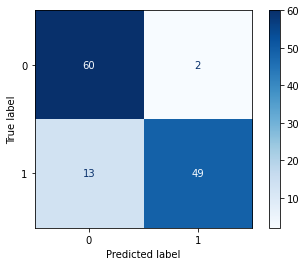

In [28]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming knn_clf is a trained k-nearest neighbors classifier
y_pred_knn = knn_clf.predict(x_test)

# Compute confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (k-Nearest Neighbors)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

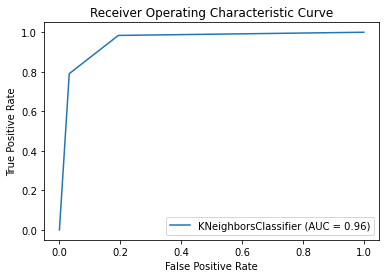

In [29]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming knn_clf is a trained k-nearest neighbors classifier
y_scores_knn = knn_clf.predict_proba(x_test)[:, 1]  # Probability estimates for the positive class

# Compute ROC curve and AUC
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_scores_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label=f'AUC = {roc_auc_knn:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve (k-Nearest Neighbors)')
plt.legend(loc='lower right')
plt.show()

# SVC

### Train Set

In [30]:
from sklearn import svm
svc_clf = svm.SVC(random_state = 7)
svc_clf.fit(x_train, y_train)
print(svc_clf.score(x_test, y_test))

0.7256637168141593


In [31]:
y_preds = svc_clf.predict(x_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.71      0.65      0.68       100
           1       0.74      0.79      0.76       126

    accuracy                           0.73       226
   macro avg       0.72      0.72      0.72       226
weighted avg       0.72      0.73      0.72       226



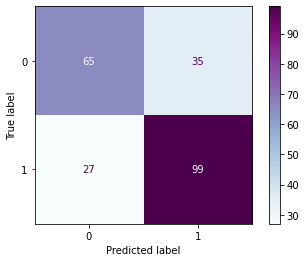

In [32]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming svc_clf is a trained Support Vector Classifier (SVC)
y_pred_svc = svc_clf.predict(x_test)

# Compute confusion matrix
cm_svc = confusion_matrix(y_test, y_pred_svc)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='BuPu', cbar=False)
plt.title('Confusion Matrix (Support Vector Classifier)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


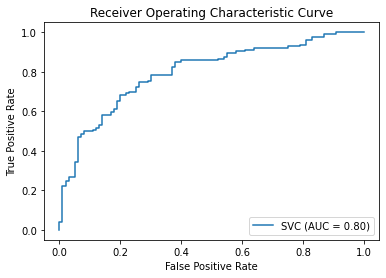

In [33]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming svc_clf is a trained Support Vector Classifier (SVC)
y_scores_svc = svc_clf.decision_function(x_test)

# Compute ROC curve and AUC
fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test, y_scores_svc)
roc_auc_svc = auc(fpr_svc, tpr_svc)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_svc, tpr_svc, color='darkorange', lw=2, label=f'AUC = {roc_auc_svc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve (Support Vector Classifier)')
plt.legend(loc='lower right')
plt.show()


### dev set (to test overfitting)

In [34]:
dev_preds = svc_clf.predict(devx)
svc_clf.score(devx, devy)

0.7016129032258065

In [35]:
print(classification_report(devy, dev_preds))

              precision    recall  f1-score   support

           0       0.77      0.58      0.66        62
           1       0.66      0.82      0.73        62

    accuracy                           0.70       124
   macro avg       0.71      0.70      0.70       124
weighted avg       0.71      0.70      0.70       124



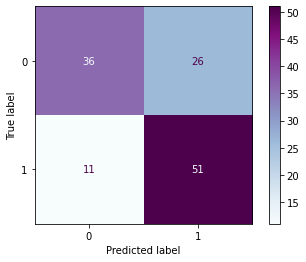

In [36]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming svc_clf is a trained Support Vector Classifier (SVC)
y_pred_svc = svc_clf.predict(x_test)

# Compute confusion matrix
cm_svc = confusion_matrix(y_test, y_pred_svc)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='BuPu', cbar=False)
plt.title('Confusion Matrix (Support Vector Classifier)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


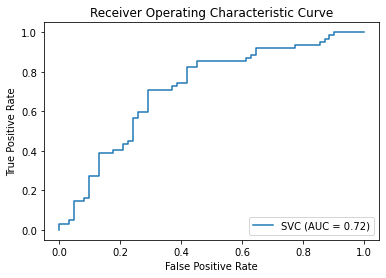

In [37]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming svc_clf is a trained Support Vector Classifier (SVC)
y_scores_svc = svc_clf.decision_function(x_test)

# Compute ROC curve and AUC
fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test, y_scores_svc)
roc_auc_svc = auc(fpr_svc, tpr_svc)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_svc, tpr_svc, color='darkorange', lw=2, label=f'AUC = {roc_auc_svc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve (Support Vector Classifier)')
plt.legend(loc='lower right')
plt.show()


# Random Forest

### Train set

In [38]:
from sklearn.ensemble import RandomForestClassifier
rand_clf = RandomForestClassifier(random_state = 31)
rand_clf.fit(x_train, y_train)
print(rand_clf.score(x_test, y_test))

0.9867256637168141


In [39]:
y_preds = rand_clf.predict(x_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       100
           1       0.99      0.98      0.99       126

    accuracy                           0.99       226
   macro avg       0.99      0.99      0.99       226
weighted avg       0.99      0.99      0.99       226



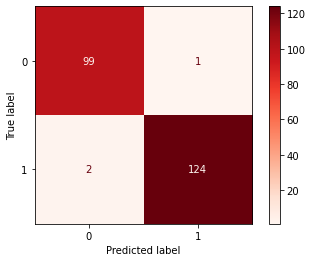

In [40]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming rand_clf is a trained Random Forest Classifier
y_pred_rand = rand_clf.predict(x_test)

# Compute confusion matrix
cm_rand = confusion_matrix(y_test, y_pred_rand)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rand, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Confusion Matrix (Random Forest Classifier)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


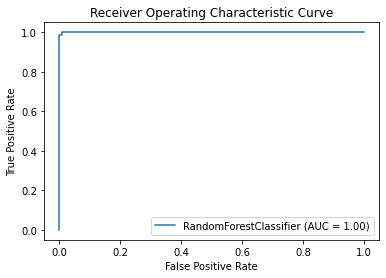

In [41]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming rand_clf is a trained Random Forest Classifier
y_scores_rand = rand_clf.predict_proba(x_test)[:, 1]  # Probability estimates for the positive class

# Compute ROC curve and AUC
fpr_rand, tpr_rand, thresholds_rand = roc_curve(y_test, y_scores_rand)
roc_auc_rand = auc(fpr_rand, tpr_rand)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rand, tpr_rand, color='darkorange', lw=2, label=f'AUC = {roc_auc_rand:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve (Random Forest Classifier)')
plt.legend(loc='lower right')
plt.show()


### dev set (to test overfitting)

In [42]:
dev_preds = rand_clf.predict(devx)
rand_clf.score(devx, devy)

0.9758064516129032

In [43]:
print(classification_report(devy, dev_preds))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98        62
           1       0.97      0.98      0.98        62

    accuracy                           0.98       124
   macro avg       0.98      0.98      0.98       124
weighted avg       0.98      0.98      0.98       124



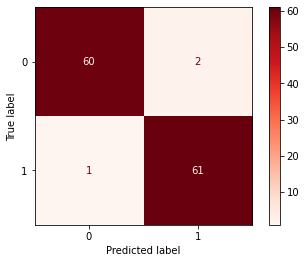

In [44]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming rand_clf is a trained Random Forest Classifier
y_pred_rand = rand_clf.predict(x_test)

# Compute confusion matrix
cm_rand = confusion_matrix(y_test, y_pred_rand)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rand, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Confusion Matrix (Random Forest Classifier)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


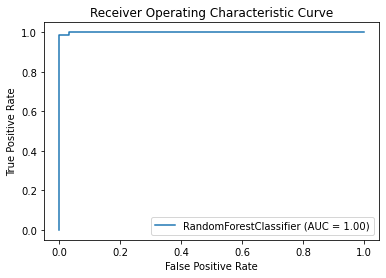

In [45]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming rand_clf is a trained Random Forest Classifier
y_scores_rand = rand_clf.predict_proba(x_test)[:, 1]  # Probability estimates for the positive class

# Compute ROC curve and AUC
fpr_rand, tpr_rand, thresholds_rand = roc_curve(y_test, y_scores_rand)
roc_auc_rand = auc(fpr_rand, tpr_rand)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rand, tpr_rand, color='darkorange', lw=2, label=f'AUC = {roc_auc_rand:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve (Random Forest Classifier)')
plt.legend(loc='lower right')
plt.show()
